## Probability Distributions (Olasılık dağılımı)

Bir olasılık dağılımı bir rassal olayın ortaya çıkabilmesi için değerleri ve olasılıkları tanımlar.

Discrete distribution da tüm individual probability'lerin toplamı 1 olmak zorunda. Mesela zar

Discrete probability distribution probability mass function(PMF) olarak da adlandırılır

Continuous distribution da olasılık eğrisi(probability curve) altında kalan alan 1 e eşit olmalı.

### Öğrenilecekler:

Discrete Probability Distributions

    Uniform Distributions

    Binomial Distributions

    Poisson Distributions

Continuous Probability Distributions

    Gaussian (Normal) Distributions and Z-Score
    
### Discrete Probability Distributions

    Uniform Distributions

    Binomial Distributions

    Poisson Distributions
    
### Uniform Distributions

Discrete: Mesela bir zar atma sonucunda ondalık bir sayı elde edilmez, 1,2,3 gibi net sonuçlar elde edilir. Bu durum discrete'dir.

Discrete demek mesela bir zar düşünün zarı 1 yada 2 kez atabiliriz ama 1 ve 2 arasında bir sayı olan 1.78 kez atamayız. Yani belli başlı sample space'e sahip distribution'lara diyoruz.

Discrete çünkü 6 tane possible result'a sahip.

Uniform çünkü bu 6 farklı sonucun çıkma olasılığı aynı.

Para, zar atma gibi durumların sonuçları uniform distribution'dur.

Uniform, probabilistic sonuçların aynı çıkmasıdır. Mesela bir zar atıldığında sonuçların 1/6 olmasıdır.

Distributions, mesela zarı binlerce kez atıyoruz. Zarların sonuçlarının dağılım şeklinde gösterilmesidir.

sample space:  [1 2 3 4 5 6]


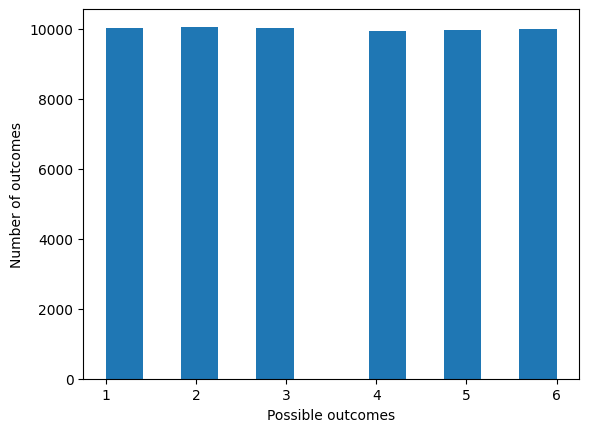

In [3]:
# zar example
import numpy as np
import matplotlib.pyplot as plt

a = np.random.randint(1,7,60000) #1 dahil 7 dahil değil 60000 tane sayı üretir.
print("sample space: ",np.unique(a))  # a değişkeninde depolananlardan kaç farklı değer var ise onları yazdırır.
plt.hist(a,bins=12) # bins =12 güzel gözüksün diye yaptım normalde 6 olmalı
plt.ylabel("Number of outcomes")
plt.xlabel("Possible outcomes")
plt.show()

Yukarıdaki kod çıktısında görüldüğü üzere her bir zar değerinden hemen hemen aynı adette bulunmaktadır. Bunun sebebi uniform distribution olmasıdır.

### Binomial Distributions

Binomial: 2 tane discrete sonucu olan bir trial(deneme) demektir.

En güzel örneği yazı tura atmaktır.

Bernoulli Trial: 

    Binomial Distributions'un içerisinde kullandığımız denklemdir.

    Success veya failure şeklinde 2 tane sonucu olan random deneylerdir. Yani deneyin birden fazla sonucu olabilir. Bu sonuçların 1 tanesini succes ve diğerlerini failure olarak tanımlarız. Ya da 1 tanesini failure ve diğerlerini success olarak tanımlarız. Mesela yazı tura örneğinde yazı gelme durumunu succes ve tura gelme durumunu failure olarak tanımlayalım. 100 tane deneme yapalım ve sonuç olarak ne kadar success(başarı) ve ne kadar failure(başarısızlık) elde ettiğimizi aşağıda görmüş olduğunuz Bernoulli denklemi ile elde edebilmekteyiz.
    
<font color="CornflowerBlue"><br>
Bernoulli denklemi:

<br>
<img src="p1.png" align = "left" style="width:200px;height:100px"/>

         n = deneme sayısıydır.

         p = başarılı (success) olma olasılığıdır.

         r = kaç tanesinde başarılı olunduğu bilgisidir.

         trials birbirinden bağımsız yani independent

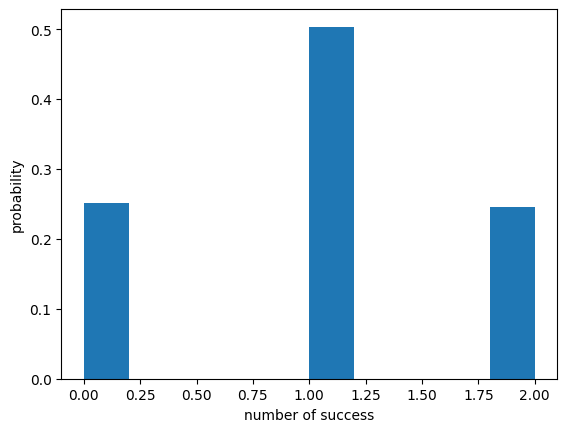

In [4]:
# yazı tura
n = 2 # number of trials
p = 0.5 # probability of each trial
s = np.random.binomial(n, p,10000) # 10000 = number of test
weights = np.ones_like(s)/float(len(s))
plt.hist(s, weights=weights) 
#weights=weights ile y ekseninde frequency değer değil de probabilistic sonuç olması sağlanmıştır.
plt.xlabel("number of success") # grafigin soluna dogru basari azaliyor
plt.ylabel("probability")
plt.show()

Ard arda iki defa zar atıldığında iki kere yazı gelme olasılığı 1/2 * 1/2 'den 0.25'tir.

Ard arda atılan zarlardan yazı-tura gelme olasılığı 0.25'tir ve tura-yazı gelme olasılığı da 0.25'tir. Bu durumların toplam olasılığı 0.5'tir.

Ard arda iki defa zar atıldığında  iki kere tura gelme olasılığı 1/2 * 1/2 'den 0.25'tir.

Çıktıda gördüğünüz üzere ilk bar yazı-yazı olasılığıdır, ikinci bar yazı-tura veya tura-yazı olasılığıdır, üçüncü bar tura-tura olasılığıdır.

Örnek: Bir zar 10 kez atılıyor. 4 kere 6 sayısı gelme olasılığı nedir?

Bu örneği koda dökerek cevaba ulaşalım.

In [5]:
n = 10
r = 4 # success
p = 1/6 # success rate

# library solution (Bernoulli denkleminin metotu ile)
from scipy.stats import binom
print(binom.pmf(r,n,p))

# formulü kendimiz yazalım:
import math
print((math.factorial(n)/(math.factorial(n-r)*math.factorial(r)))*(p**r)*(1-p)**(n-r))

0.054265875850988195
0.05426587585098817


### Poisson Distributions

Binomial: number of successes out of n trials

Poisson: number of successes per unit of time

Mesela 1 saatteki başarılı üretim sayısı nedir gibi bir interval belirlenir.

lambda = number of occurences / interval

interval zaman olabilir, distance(mesafe) olabilir

Örneğin lambda = 10 olsun. Bir taşımacılık şirketi için bu değer her bir saatte ortalama 10 kamyon anlamına gelebilir.

<br>
<img src="p2.png" align = "left" style="width:200px;height:100px"/>

Text(0, 0.5, 'probability')

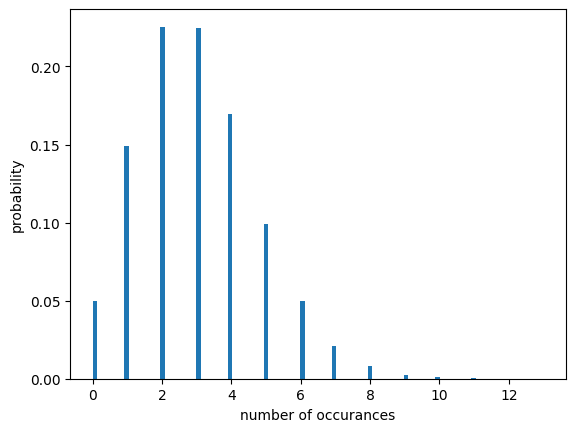

In [6]:
# örnegin her saatte ortalama 3 kamyon gorsellestirmesi
lamda = 3
s1 = np.random.poisson(lamda,100000)
weights1 = np.ones_like(s1)/float(len(s1))
plt.hist(s1, weights=weights1,bins = 100)
plt.xlabel("number of occurances") # grafigin soluna dogru basari azaliyor
plt.ylabel("probability")
# sekilde goruldugu gibi en yuksek olasilik saatte 10 kamyon ama saatte 20 kamyon bile olabilir

<font color="LightCoral"><br>
Grafiklere dair örnek görseller:

<br>
<img src="p3.png" align = "left" style="width:1000px;height:300px"/>

### Continuous Probability Distributions

Discrete'de sayılar int tipindedir. Mesela yukarıdaki grafilerden ilki gibidir. Sonucu net, açık olan değerlere discrete denir. Yukarıda gördüğünüz üzere discrete'de barlar vardır. Aşağıda gördüğünüz üzere continuous'ta line vardır. Continuous'ta virgüllü sayılar söz konusu olduğu için bar çizmek pek mümkün olmayacaktır. Mesela 2.2 'ye bar çizilmeye çalışıldığını düşünün. DOlayısıyla line çizmek daha uygun olur.

PDF - CDF olmak üzere iki başlık incelenedektir.

PDF: Probability Density Function 

    PDF'ye bir örnek verelim. x ekseni alınabilecekd eğerler ve y ekseni probability'dir. Belli bir x türündeki çiçeğin yaprak uzunluğunu düşünün. Aşağıdaki ilk görsele bakınız. Bu görsele göre yorum yapacak olursak, dünyadaki x türündeki çiçeğin yprak uzunluğu genellikle 0'dır. 0.4 olasılıkla 0'dır.
    
CDF: Cumulative Distribution Function

    CDF'ye bir örnek verelim. x türünün yaprak uzunluğunun 0, -1, -2 ... olması için tüm değerleirn toplamını istersek bu CDF'dir. Aşağıdaki ilk görsele bakınız. 0'ın sağ tarafındaki dağılım ile sol tarafındaki dağılım birbirlerine eşit yani simetriktir. -4'ten itibaren 0'a kadar tüm yaprak uzunluğu değerlerinin olasılığını bulalım. Bu simetrik olduğuna göre direk 0.5 diyebiliriz. Yani bu yaprak uzunluğunun 0'dan küçük olma olasılığı 0.5'tir.
    
Aşağıdaki ikinci görsel, CDF'ye aittir.

❗ PDF'in integrali CDF'tir. CDF'in türevi PDF'tir.

<br>
<img src="p4.png" align = "left" style="width:400px;height:400px"/>

### Gaussian (Normal) Distributions

Continuous Probability Distributions "Probability density functions (PDF)" olarak da adlandırılır

Gaussian ayrıca Bell Shaped Distribution olarak da adlandırılır.

Gasussian distribution'ın önemli olmasının bir sebebi gerçek hayatta pek çok örneğinin olmasıdır. Mesela:

    IQ: Dünyadaki tüm insanların IQ seviyeleri Gaussion dağılımdır.

    Boy ve kilo: Dünyadaki tüm insanların boylarının veya kilolarının dağılımları Gaussion Distribution'dur.

Gaussion distribution simetriktir. Bir mean değeri etrafında belirli bir standart deviation'a göre dağılım gösterirler.

Bir örnek ile anlatayım.

İnsanların zekaları farklılık göstermektedir.

    Dünyada yaşayan insanların ortalama IQ değeri 110'dur.

    Ortalama 110 olsa da bazı insanlar öyle zeki ki, IQ seviyeleri 140, 150 olabilir.

    Ortalama 110 olsa da bazı insanların IQ seviyeleri 40, 50 olabilir.

    From these information we can say that mean of IQ is 110. And lets say standart deviation is 20.
    
    Tüm dünyada yaşayan insanların %66'sının zeka seviyesi 110 civarındadır. +-20 diyelim. +- denilen standart deviation'dur.

    Mean and standart deviation is parameters of normal distribution.

100000 tane insanın IQ seviyesini Gaussion Distribution'a göre oluşturalım.

mean:  110.03197631900181
standart deviation:  19.96034478760073


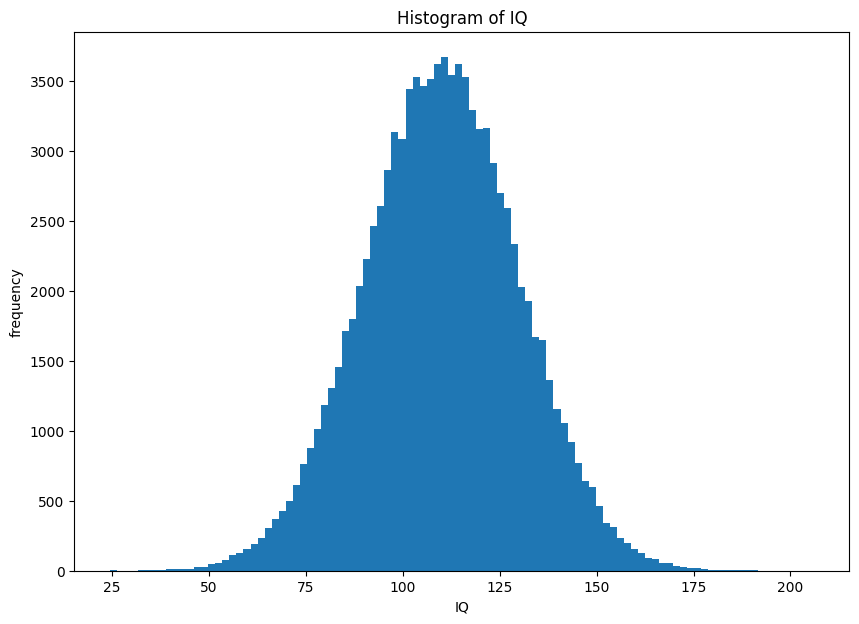

In [8]:
# parameters of normal distribution
mu, sigma = 110, 20  # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation: ", np.std(s))
# visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

Elde edilen grafik şunu ifade etmektedir: 100000 tane insanın IQ seviyesi ölçülmüştür. 100000 insanın ortalama IQ değeri 110 civarındadır. Tabiki her insanın IQ değeir aynı olamayacağından, 110'dan daha yüksekler de vardır, daha azlar da vardır.

Burada sigma=20'dir. Bunun anlamı, 110+20=130 ve 110-20=90'dır. 90 ve 130 arasındaki dağılım tüm insanların %66'sını oluşturmaktadır. Aslında %68'dir fakat akılda kalıcılığı açısından %66 denmektedir genelde. Bu fark çokta önemli değildir.

Burada standart deviation, insanların mean'den ne kadar uzakta olduklarıdır.

Standart deviation'un türkçesi yayılımdır. Ortalamaya göre ne kadar yayıldıklarıdır.

### Z-Score

Mean değeri, topluluğun ortalama değeridir. Yukarıdkai örnekte 110 idi. Standart deviation ise yayılımdır. Yukarıdaki örnekte 20 idi. Standart deviation aynı zamanda bir sigma olarak adlandırılabilir. Yani 110+20=130 bir sigma olarak adlandırılır. Standart deviation yayılım olduğu için mean'den yani 110'dan 130'a kadar olan alana bir sigma denir. mean-sigma 'nın olduğu yerde bir sigma  olarak adlandırılır. Bu bir sigmalık iki alan %68'lik (%66 demiştik akılda kalsın diye) kısımdır.

Bu %68'in anlamı, dünyada rastgele seçeceğimiz insanların IQ değerlerinin bir sigmalık alanda olma olasılığı %68'dir.

<br>
<img src="p5.png" align = "left" style="width:800px;height:500px"/>

Yeşil çizgilerden kırmızı çizgiye olan kısımlar bir sigma bölgesidir. Seçtiğimiz insanın IQ'sunun 80 ve 140 yani yeşil çizgiler arasında olma olasılığı nedir? Bunu hesaplamak için Z-Score değerini kullanırız.

mean-sigma ve mean+sigma arasındaki insanların IQ değeri %68 olarak ezbere bilinmektedir. Mesela 80 ile 140 arasındaki olasılığı öğrenmek istersek z-score'yi kullanırız.

z-score formülü:

    z = (x - mean)/std

Formülü uygulayalım:

z1 = (80-110)/20 = -1.5

z2 = (140-110)/20 = 1.5

Bulunan değerlerdeki - ve +'lar yönü göstermektedir. +, sağ taraftaki alanı, - sol taraftaki alanı ifade etmektedir.

Bir z table vardır:

<br>
<img src="p6.png" align = "left" style="width:800px;height:500px"/>

Tabloda görüleceği üzere, 1.5 standart deviation'a karşılık gelen z değeri 0.4332'tür.

Sonrasında 0.4332 değeri 2 ile çarpılır. Çünkü 1.5 değerine denk gelen z değeri 0.4332'müş ama -1.5 ve 1.5 olmak üzere toplamda 1.5+1.5=3 standart deviation var. Bu durumda 0.4332*2 yapılır.

0.4332 * 2 = 0.8664

86.64 % of people has an IQ between 80 and 140.

Yani insanların %86'sının IQ değeri 80 ile 140 arasındadır.